# EDA

Булыгин Олег:
* [LinkedIn](linkedin.com/in/obulygin)
* [Канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)


Разведочный анализ данных (EDA) анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Концепция EDA разработана американским математиком Джоном Тьюки еще в 1970-х годах, и до сих пор является важным этапом аналитических работа.

Джон Тьюки выделял следующие цели EDA:
- максимальное «проникновение» в данные,
- выявление основных структур,
- выбор наиболее важных переменных,
- обнаружение отклонений и аномалий,
- проверка основных гипотез,
- разработка начальных моделей.

Для примера будем использовать набор данных о клиентах страховой компании.


In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")

In [ ]:
# Посмотрим на размеры датафрейма
df.shape

(10000, 19)

In [ ]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [ ]:
df.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


# Подготовка данных

## Работа с пропусками

In [ ]:
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [ ]:
df.groupby("income")["credit_score"].median()

income
middle class     0.526747
poverty          0.349915
upper class      0.616289
working class    0.431376
Name: credit_score, dtype: float64

In [ ]:
df["credit_score"] = df["credit_score"].fillna(df.groupby(by="income")["credit_score"].transform('median'))

In [ ]:
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [ ]:
df.groupby("age")["annual_mileage"].median()

age
16-25    13000.0
26-39    12000.0
40-64    11000.0
65+      11000.0
Name: annual_mileage, dtype: float64

In [ ]:
df["annual_mileage"] = df["annual_mileage"].fillna(df.groupby("age")["annual_mileage"].transform('median'))

df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

## Исключение неиформатированных столбцов

In [ ]:
df.drop(["id", "postal_code"], axis=1, inplace=True)

# Исследовательский анализ

## Однофакторный анализ


In [ ]:
df["gender"].value_counts()

female    5010
male      4990
Name: gender, dtype: int64

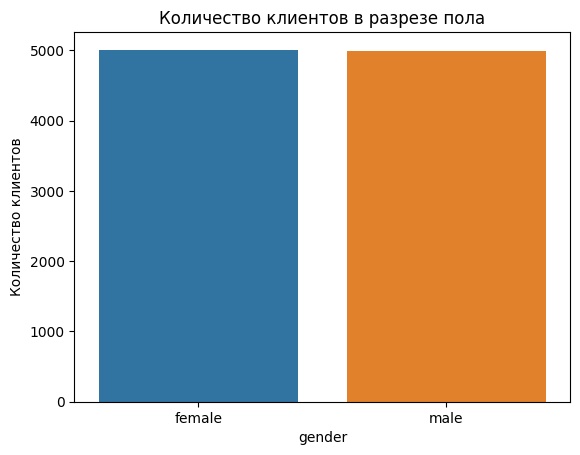

In [ ]:
sns.countplot(data=df, x="gender")
plt.title("Количество клиентов в разрезе пола")
plt.ylabel("Количество клиентов")
plt.show()

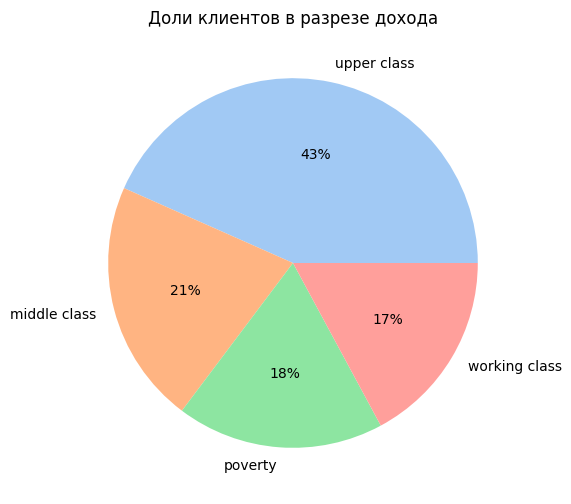

In [ ]:
plt.figure(figsize=[6, 6])

data = df["income"].value_counts(normalize=True)

labels = ["upper class", "middle class", "poverty", "working class"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Доли клиентов в разрезе дохода")
plt.show()

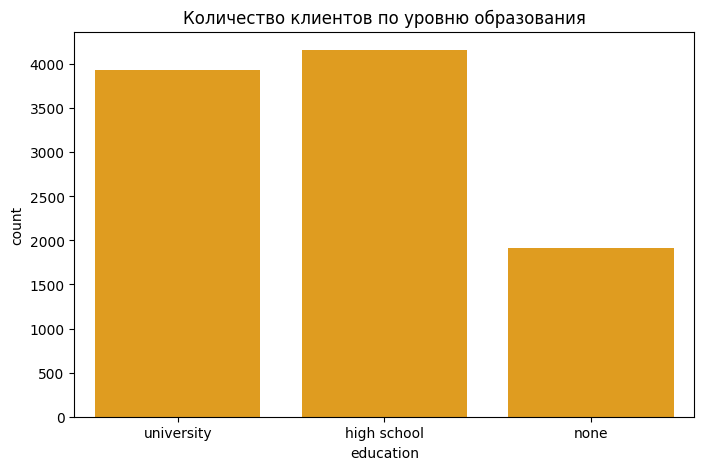

In [ ]:
plt.figure(figsize=[8,5])
sns.countplot(data=df, x="education", order=["university", "high school", "none"], color="orange")
plt.title("Количество клиентов по уровню образования")
plt.show()

In [ ]:
df["credit_score"].describe()

count    10000.000000
mean         0.515429
std          0.134677
min          0.053358
25%          0.421301
50%          0.526747
75%          0.616289
max          0.960819
Name: credit_score, dtype: float64

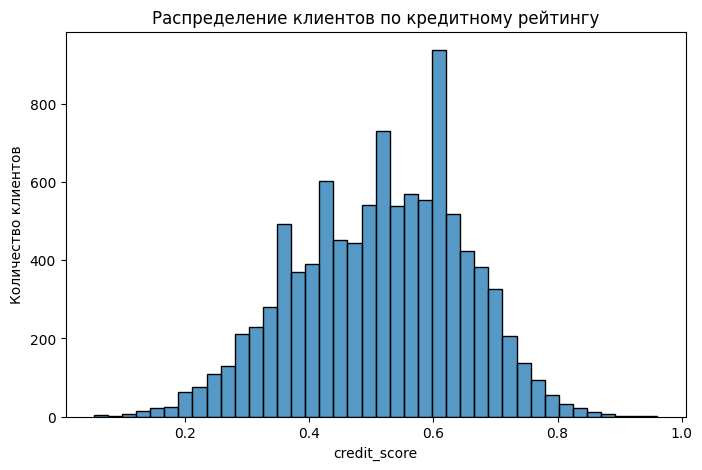

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="credit_score", bins=40)
plt.title("Распределение клиентов по кредитному рейтингу")
plt.ylabel("Количество клиентов")
plt.show()

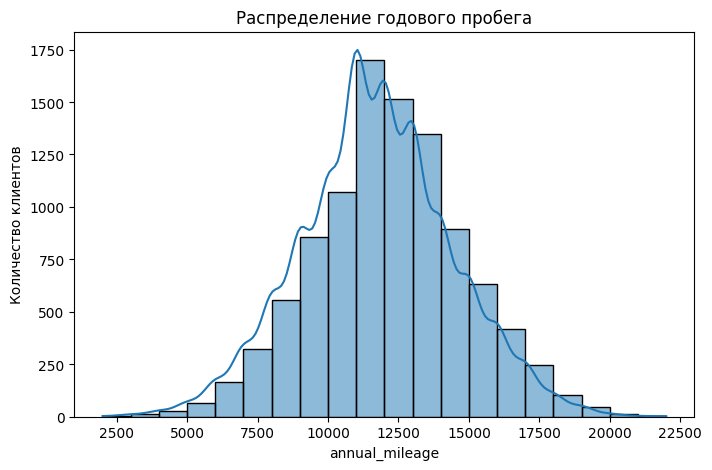

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="annual_mileage", bins=20, kde=True)
plt.title("Распределение годового пробега")
plt.ylabel("Количество клиентов")
plt.show()

## Двухфакторный анализ

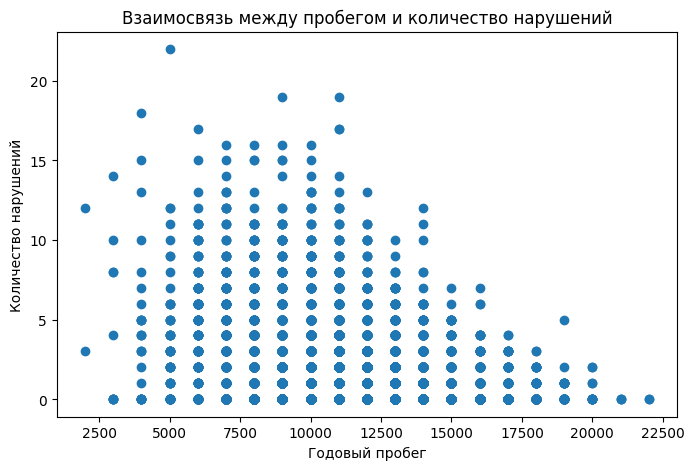

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(data=df, x="annual_mileage", y="speeding_violations")
plt.title("Взаимосвязь между пробегом и количество нарушений")
plt.ylabel("Количество нарушений")
plt.xlabel("Годовый пробег")
plt.show()

In [ ]:
corr_matrix_pearson = df[["speeding_violations", "DUIs", "past_accidents"]].corr()
corr_matrix_pearson

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


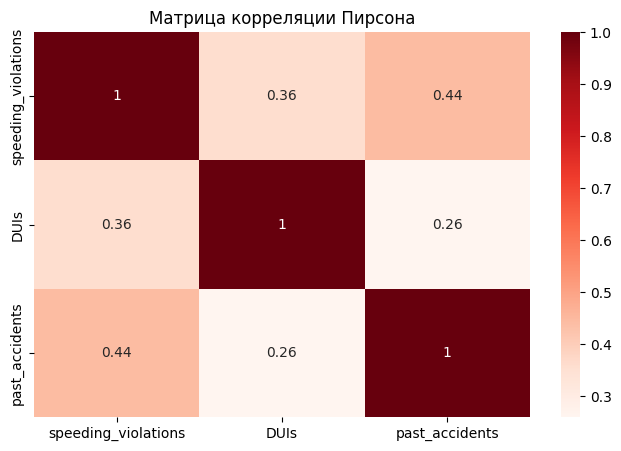

In [ ]:
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

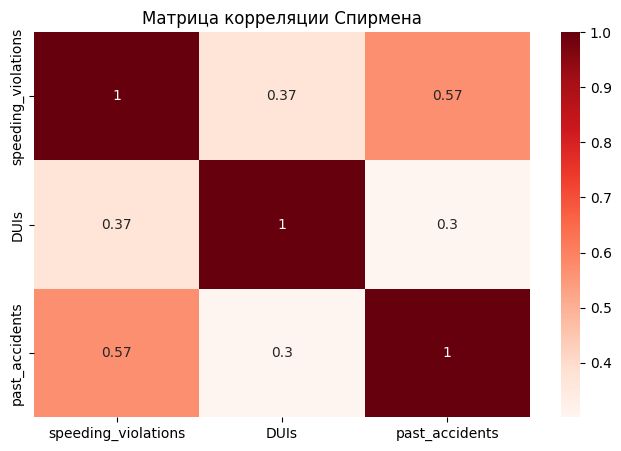

In [ ]:
corr_matrix_spearman = df[["speeding_violations", "DUIs", "past_accidents"]].corr('spearman')
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_spearman, annot=True, cmap='Reds')
plt.title("Матрица корреляции Спирмена")
plt.show()

In [ ]:
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11354.157565
True     12464.730290
Name: annual_mileage, dtype: float64

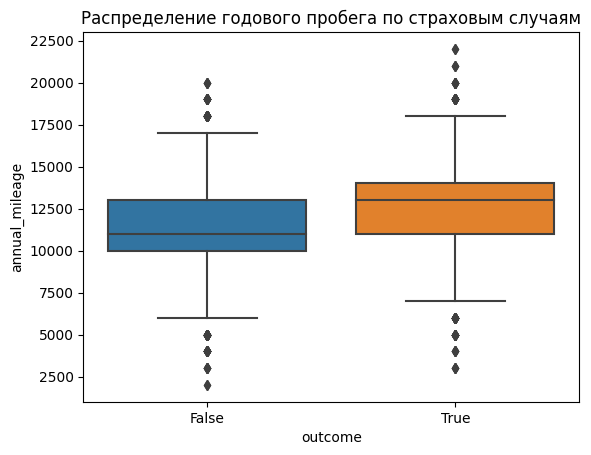

In [ ]:
sns.boxplot(data=df, x='outcome', y='annual_mileage')
plt.title("Распределение годового пробега по страховым случаям")
plt.show()

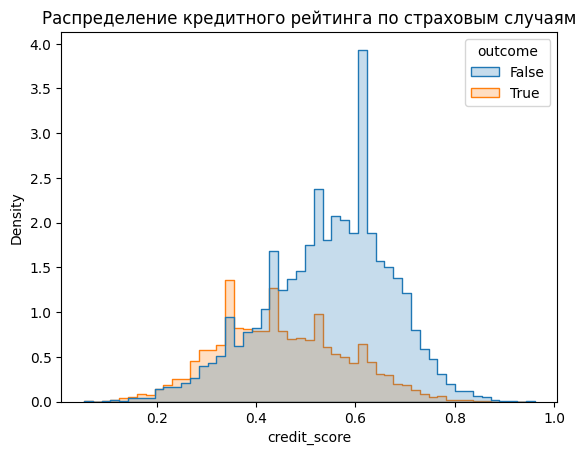

In [ ]:
sns.histplot(df, x="credit_score", hue="outcome", element="step", stat="density")
plt.title("Распределение кредитного рейтинга по страховым случаям")
plt.show()

In [ ]:
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

0    6867
1    3133
Name: claim_rate, dtype: int64

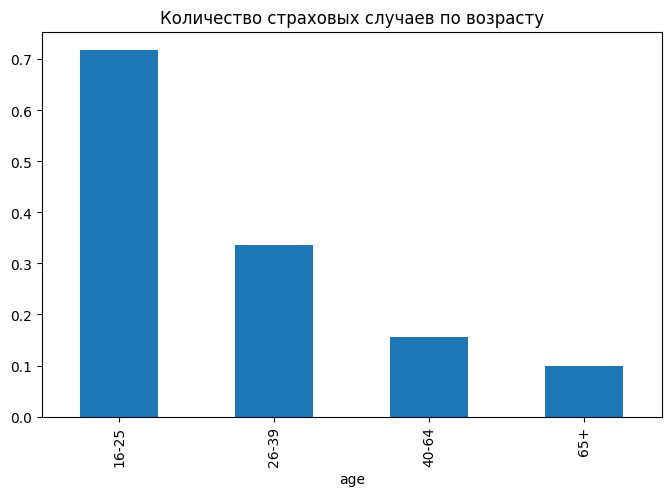

In [ ]:
plt.figure(figsize=[8,5])
df.groupby('age')['claim_rate'].mean().plot(kind="bar")
plt.title("Количество страховых случаев по возрасту")
plt.show()

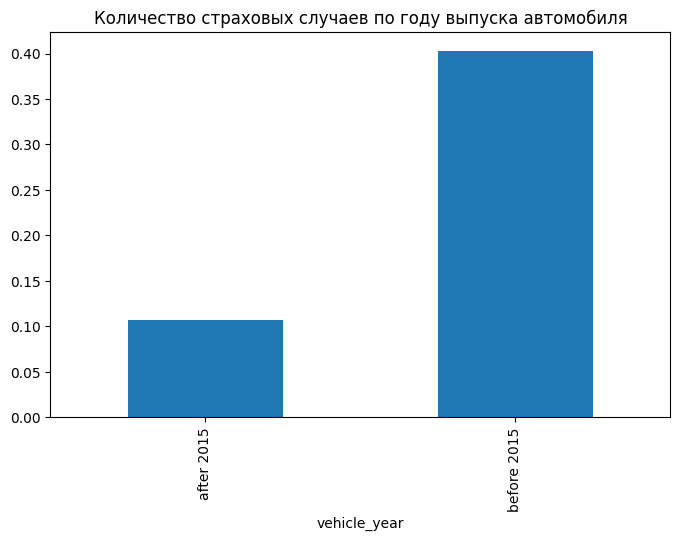

In [ ]:
plt.figure(figsize=[8,5])
df.groupby('vehicle_year')['claim_rate'].mean().plot(kind="bar")
plt.title("Количество страховых случаев по году выпуска автомобиля")
plt.show()


TypeError: ignored

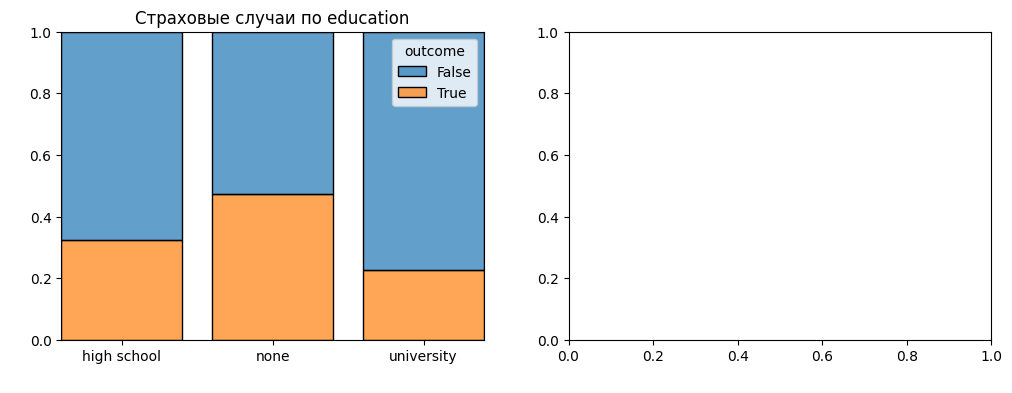

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

for i,col in enumerate(["education", "income"]):
    sns.histplot(df, ax=axes[i], x=col, hue="outcome", stat="probability", multiple="fill", shrink=.8, alpha=0.7)
    axes[i].set(title="Страховые случаи по " + col,ylabel=" ",xlabel=" ")

## Многофакторный анализ

In [ ]:
edu_income = pd.pivot_table(data=df, index='education', columns='income', values='claim_rate', aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


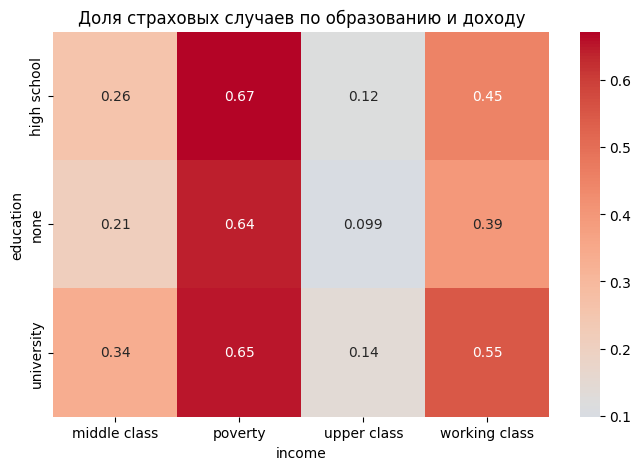

In [ ]:
plt.figure(figsize=[8,5])
sns.heatmap(edu_income, annot=True, cmap='coolwarm',center=0.117)
plt.title("Доля страховых случаев по образованию и доходу")
plt.show()

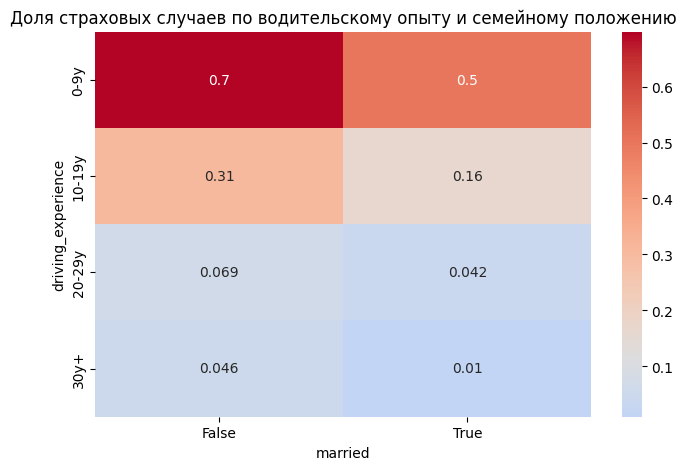

In [ ]:
driv_married = pd.pivot_table(data=df, index='driving_experience', columns='married', values='claim_rate')

plt.figure(figsize=[8,5])
sns.heatmap(driv_married, annot=True, cmap='coolwarm', center=0.117)
plt.title("Доля страховых случаев по водительскому опыту и семейному положению")
plt.show()

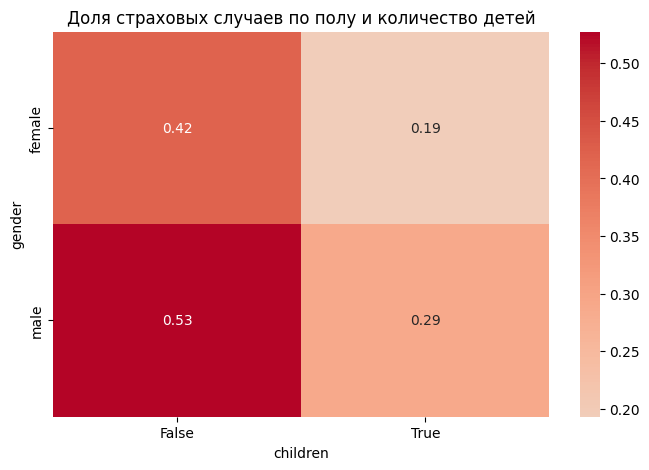

In [ ]:
gender_children = pd.pivot_table(data=df, index='gender', columns='children', values='claim_rate')

plt.figure(figsize=[8,5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Доля страховых случаев по полу и количество детей")
plt.show()